# Análisis Ranking Mejores Deportistas
## Analizamos el Dataset Forbes Richest Atheletes 1990 - 2020

*Encontramos 300 registros que contienen los datos de 1990 a 2020 con los atletas, su nacionalidad, el ranking en que se encuntran y el ranking en el que estuvieron de manera previa, el deporte que practican y cuales son sus percepciones*

### En un primer acercamiento a los datos encontramos que:
- La ganancia más alta es de 300 million
- El deporte que más aparece es el Tennis 
- Los deportistas de Basketball son los mejor pagados
- Por mucho el país con mayores ganancias es USA

### Ahora daremos respuesta a las siguientes preguntas:
- Deportistas cuyo ranking ha subido al menos dos lugares entre 2010 y 2020.
- Atleta con el menor número de apariciones y mayores ganancias.
- Deporte y país con mayor número de atletas no rankeados que entraron en la lista de atletas mejor pagados.
- País con mayor número de deportes con atletas en el dataset.
- ¿Cuántos atletas por deporte tiene cada país?
- Ganancia mínima y máxima (dentro del dataset) por deporte y por país.
- Atleta con mayores ganancias por deporte por década
- Ganancia total por cada deporte por cada año.


# Proyecto

In [3]:
# Limpieza de Datos
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re

### Limpieza de Datos

In [4]:
# Lectura datos
df = pd.read_csv('Forbes Richest Atheletes (Forbes Richest Athletes 1990-2020).csv')
df.head()

,S.NO,Name,Nationality,Current Rank,Previous Year Rank,Sport,Year,earnings ($ million)
0,1,Mike Tyson,USA,1,NaN,boxing,1990,28.6
1,2,Buster Douglas,USA,2,NaN,boxing,1990,26.0
2,3,Sugar Ray Leonard,USA,3,NaN,boxing,1990,13.0
3,4,Ayrton Senna,Brazil,4,NaN,auto racing,1990,10.0
4,5,Alain Prost,France,5,NaN,auto racing,1990,9.0


In [5]:
# Se crea una copia de los datos, que es con la que vamos a trabajar
deportistas = df.copy()

In [6]:
# Eliminamos las columnas que no se necesitan
deportistas.drop('S.NO', axis=1, inplace=True)

In [7]:
# Colocamos 'Year' como index
deportistas.set_index('Year', inplace=True)
deportistas.head()

,Name,Nationality,Current Rank,Previous Year Rank,Sport,earnings ($ million)
Year,,,,,,
1990,Mike Tyson,USA,1,NaN,boxing,28.6
1990,Buster Douglas,USA,2,NaN,boxing,26.0
1990,Sugar Ray Leonard,USA,3,NaN,boxing,13.0
1990,Ayrton Senna,Brazil,4,NaN,auto racing,10.0
1990,Alain Prost,France,5,NaN,auto racing,9.0


In [8]:
# Colocamos la columna 'Sport' en mayúsculas
deportistas['Sport'] = deportistas['Sport'].str.upper()

In [9]:
# Los valores NaN en la columna 'Previous Year Rank' se reemplazan por 0
deportistas['Previous Year Rank'] = deportistas['Previous Year Rank'].fillna(0)
deportistas.head()

,Name,Nationality,Current Rank,Previous Year Rank,Sport,earnings ($ million)
Year,,,,,,
1990,Mike Tyson,USA,1,0,BOXING,28.6
1990,Buster Douglas,USA,2,0,BOXING,26.0
1990,Sugar Ray Leonard,USA,3,0,BOXING,13.0
1990,Ayrton Senna,Brazil,4,0,AUTO RACING,10.0
1990,Alain Prost,France,5,0,AUTO RACING,9.0


In [10]:
# Sustuir '?' por '0'
deportistas['Previous Year Rank'] = deportistas['Previous Year Rank'].replace('?', 0)
deportistas['Previous Year Rank'] = deportistas['Previous Year Rank'].replace('??', 0)
deportistas.head()

,Name,Nationality,Current Rank,Previous Year Rank,Sport,earnings ($ million)
Year,,,,,,
1990,Mike Tyson,USA,1,0,BOXING,28.6
1990,Buster Douglas,USA,2,0,BOXING,26.0
1990,Sugar Ray Leonard,USA,3,0,BOXING,13.0
1990,Ayrton Senna,Brazil,4,0,AUTO RACING,10.0
1990,Alain Prost,France,5,0,AUTO RACING,9.0


### Pregunta 1: Deportistas cuyo ranking ha subido al menos dos lugares entre 2010 y 2020.

In [11]:
deportistas.loc[2010:2020]

,Name,Nationality,Current Rank,Previous Year Rank,Sport,earnings ($ million)
Year,,,,,,
2010,Tiger Woods,USA,1,1,GOLF,105.0
2010,Floyd Mayweather,USA,2,>10,BOXING,65.0
2010,Kobe Bryant,USA,3,2,BASKETBALL,48.0
2010,Phil Mickelson,USA,4,6,GOLF,46.0
2010,David Beckham,UK,5,5,SOCCER,43.7
...,...,...,...,...,...,...
2020,Stephen Curry,USA,6,9,BASKETBALL,74.4
2020,Kevin Durant,USA,7,10,BASKETBALL,63.9
2020,Tiger Woods,USA,8,11,GOLF,62.3


In [12]:
# Eliminar signo '>' de la columna 'Previous Year Rank'
deportistas['Previous Year Rank'] = deportistas['Previous Year Rank'].str.replace('>', '')

In [13]:
# Mostrar solo el Nombre, Rango Actual, Rango del Año Anterior y el Deporte
deportistas.loc[2010:2020, ['Name', 'Current Rank', 'Previous Year Rank', 'Sport']].head()

,Name,Current Rank,Previous Year Rank,Sport
Year,,,,
2010,Tiger Woods,1,1,GOLF
2010,Floyd Mayweather,2,10,BOXING
2010,Kobe Bryant,3,2,BASKETBALL
2010,Phil Mickelson,4,6,GOLF
2010,David Beckham,5,5,SOCCER


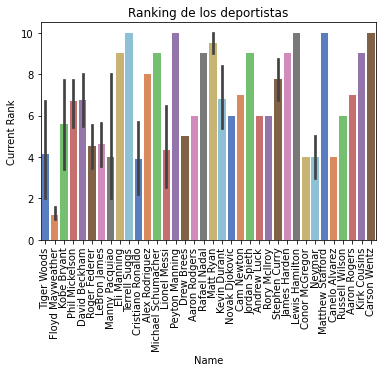

In [14]:
# Gragraficar el ranking de los deportistas
sns.barplot(
    x='Name', y='Current Rank', data=deportistas.loc[2010:2020, ['Name', 'Current Rank', 'Previous Year Rank']], palette='muted'
)

plt.xticks(rotation=90)
plt.title('Ranking de los deportistas')
plt.show()

### Atleta con el menor número de apariciones y mayores ganancias

In [15]:
# Contar cuantas apariciones tiene cada atleta
deportistas['Name'].value_counts()

Tiger Woods           19
Michael Jordan        19
Kobe Bryant           14
LeBron James          13
Michael Schumacher    13
                      ..
Tom Brady              1
Michael Moorer         1
Dale Earnhardt Jr.     1
Greg Norman            1
Carson Wentz           1
Name: Name, Length: 82, dtype: int64

In [16]:
# Filtrar el atleta con mayor numero de apariciones y el salario mas alto
atleta = deportistas['Name'].value_counts().idxmax()
salario = deportistas[deportistas['Name'] == atleta]['earnings ($ million)'].max()
print(f"{atleta} tiene el mayor numero de apariciones y el salario mas alto es de {salario} millones de dolares")

Tiger Woods tiene el mayor numero de apariciones y el salario mas alto es de 115.0 millones de dolares


### Deporte y país con mayor número de atletas no rankeados que entraron en la lista de atletas mejor pagados. 

In [17]:
# País con mayor numero de atletas donde Previous Year Rank es 'not ranked'
pais = deportistas[deportistas['Previous Year Rank'] == 'not ranked']['Nationality'].value_counts().idxmax()
print(f"El pais con mayor numero de atletas donde no rankeados es {pais}")

El pais con mayor numero de atletas donde no rankeados es USA


### País con mayor número de deportes con atletas en el dataset.

In [23]:
deportistas['Nationality'].value_counts().idxmax()

'USA'

### ¿Cuántos atletas por deporte tiene cada país?

In [25]:
# Numero de Atletas por país
deportistas['Nationality'].value_counts()

USA                 206
UK                   13
Germany              13
Switzerland          12
Portugal             10
Brazil                9
Argentina             9
Canada                6
Italy                 4
Finland               3
France                3
Philippines           3
Russia                1
Australia             1
Dominican             1
Austria               1
Filipino              1
Spain                 1
Serbia                1
Northern Ireland      1
Ireland               1
Mexico                1
Name: Nationality, dtype: int64

### Ganancia mínima y máxima (dentro del dataset) por deporte y por país.

In [31]:
min_max = df.groupby(['Sport', 'Nationality']).agg({'earnings ($ million)': ['min', 'max']})
min_max

earnings ($ million)       
                                                               min    max
Sport                        Nationality                                 
American Football            USA                              29.0   89.5
American Football / Baseball USA                              22.5   22.5
Auto Racing                  Austria                          13.5   13.5
                             Brazil                           22.0   22.0
                             Canada                           20.0   23.0
                             France                           16.0   16.0
                             Germany                          49.0   59.0
                             UK                               11.3   14.5
                             USA                              26.5   26.5
Auto Racing (Nascar)         USA                              20.0   24.5
Auto racing                  Brazil                           18.5   18.5
Baseball                     USA                              12.7   26.0
Basketball                   USA                              12.9   89.0
Boxing                       Filipino                         62.0   62.0
                             Mexico                           94.0   94.0
                             Philippines                     160.0  160.0
                             USA                              12.0  300.0
F1 Motorsports               Germany                          33.0   75.0
F1 racing                    Finland                          40.0   45.0
                             Germany                          34.0   80.0
Golf                         Northern Ireland                 50.0   50.0
                             USA                               9.2   78.1
Hockey                       Canada                           17.9   17.9
Ice Hockey                   Canada                           13.5   13.5
                             Russia                           29.8   29.8
MMA                          Ireland                          99.0   99.0
NASCAR                       USA                              19.1   34.0
NBA                          USA                              15.2   15.2
NFL                          USA                               9.5   16.5
Soccer                       Argentina                        41.3  127.0
                             Brazil                           90.0  105.0
                             Portugal                         42.5  109.0
                             UK                               46.0   47.2
Tennis                       Serbia                           55.8   55.8
                             Spain                            44.5   44.5
                             Switzerland                      52.7  106.3
                             USA                               8.5   24.0
auto racing                  Brazil                           10.0   13.0
                             France                            9.0   11.0
                             Germany                          15.0   15.0
                             UK                                9.0   46.0
baseball                     Dominican                        35.0   35.0
                             USA                              26.2   29.0
basketball                   USA                               8.1   53.0
boxing                       Canada                           10.2   10.2
                             Philippines                      40.0   42.0
                             USA                               8.1   65.0
cycling                      USA                              28.0   28.0
golf                         Australia                         8.5    8.5
                             USA                               8.1  115.0
ice hockey                   Canada                           14.5   14.5
motorcycle gp                Italy                

### Atleta con mayores ganancias por deporte por década

In [35]:
max_ganancia = df.groupby(['Name', 'Year']).agg({'earnings ($ million)': 'max'})
max_ganancia

earnings ($ million)
Name            Year                      
Aaron Rodgers   2013                  49.0
Aaron Rogers    2019                  89.3
Alain Prost     1990                   9.0
                1991                  11.0
                1993                  16.0
...                                    ...
Valentino Rossi 2006                  30.0
                2008                  35.0
                2009                  35.0
Wayne Gretzky   1994                  13.5
                1995                  14.5

[301 rows x 1 columns]

#### Ganancia total por cada deporte por cada año.

In [38]:
ganancia_total = df.groupby(['Sport', 'Year']).agg({'earnings ($ million)': 'sum'})
ganancia_total

earnings ($ million)
Sport             Year                      
American Football 2004                  42.0
                  2005                  37.5
                  2006                  29.0
                  2010                  78.2
                  2012                  42.4
...                                      ...
tennis            1995                  16.0
                  2004                  28.2
                  2008                  35.0
                  2010                  43.0
                  2011                  47.0

[177 rows x 1 columns]